In [41]:
import sys
sys.path.append('../src')
from modules import *
from funkcije import calculate_fingerprint

# PREPROCESSING

## UČITAVANJE PODATAKA

In [42]:
data = pd.read_csv('../../data/solubility_new.csv')

In [43]:
data

,smiles,Solubility
0,CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127
1,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,-4.662065
2,CCC1CCC(CCC(=O)O)C1,-3.286116
3,CC12C=CC(=O)C=C1CCC1C2C(O)CC2(C)C1CC(O)C2(O)C(...,-2.664549
4,O=C(OCCCOCCCOC(=O)c1ccccc1)c1ccccc1,-4.595503
...,...,...
3346,C[C@H]1CN(c2c(F)c(N)c3c(=O)c(C(=O)O)cn(C4CC4)c...,-3.370000
3347,CC1=C(CC(=O)O)c2cc(F)ccc2C1=Cc1ccc([S+](C)[O-]...,-4.500000
3348,CCCCNc1ccc(C(=O)OCCN(C)C)cc1,-3.010000
3349,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,-2.930000


## IZRAČUNAVANJE 2D DESKRIPTORA

In [44]:
# Pretvaranje SMILES zapisa u molekulu
mol_column=data.smiles.apply(Chem. MolFromSmiles).rename('mol', inplace=True)

In [45]:
# Pretvaranje molekula u numeričke značajke
logp=mol_column.apply(Descriptors.MolLogP).rename('logp', inplace=True) 
molwt=mol_column.apply(Descriptors.MolWt).rename('molwt', inplace=True) 
balabanj=mol_column.apply(Descriptors.BalabanJ).rename('balabanj', inplace=True) 
tpsa=mol_column.apply(Descriptors.TPSA).rename('tpsa', inplace=True)

In [46]:
final_data=pd.concat([data, mol_column, logp, molwt, balabanj, tpsa], axis=1) 
final_data

,smiles,Solubility,mol,logp,molwt,balabanj,tpsa
0,CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,<rdkit.Chem.rdchem.Mol object at 0x7f800b8ffdf0>,6.95410,312.606,2.998602,0.00
1,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,-4.662065,<rdkit.Chem.rdchem.Mol object at 0x7f800b8ffed0>,2.48540,422.525,1.084427,56.60
2,CCC1CCC(CCC(=O)O)C1,-3.286116,<rdkit.Chem.rdchem.Mol object at 0x7f800b8fff40>,2.67750,170.252,2.145839,37.30
3,CC12C=CC(=O)C=C1CCC1C2C(O)CC2(C)C1CC(O)C2(O)C(...,-2.664549,<rdkit.Chem.rdchem.Mol object at 0x7f800b9a4190>,0.52840,376.449,1.776978,115.06
4,O=C(OCCCOCCCOC(=O)c1ccccc1)c1ccccc1,-4.595503,<rdkit.Chem.rdchem.Mol object at 0x7f800b9a42e0>,3.49720,342.391,1.447050,61.83
...,...,...,...,...,...,...,...
3346,C[C@H]1CN(c2c(F)c(N)c3c(=O)c(C(=O)O)cn(C4CC4)c...,-3.370000,<rdkit.Chem.rdchem.Mol object at 0x7f800b9503c0>,2.08160,392.406,2.046795,100.59
3347,CC1=C(CC(=O)O)c2cc(F)ccc2C1=Cc1ccc([S+](C)[O-]...,-4.500000,<rdkit.Chem.rdchem.Mol object at 0x7f800b950430>,4.36550,356.418,2.086459,60.36
3348,CCCCNc1ccc(C(=O)OCCN(C)C)cc1,-3.010000,<rdkit.Chem.rdchem.Mol object at 0x7f800b9504a0>,2.61700,264.369,2.394548,41.57
3349,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,-2.930000,<rdkit.Chem.rdchem.Mol object at 0x7f800b950510>,-0.21440,444.440,2.047922,181.62


In [47]:
final_data.describe()

,Solubility,logp,molwt,balabanj,tpsa
count,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000
mean,-3.447088,3.037575,299.859541,2.633169,60.594097
std,2.192194,2.834571,150.503923,0.899036,47.542862
min,-13.171900,-17.406400,92.141000,0.000000,0.000000
25%,-4.789493,1.538850,198.306000,1.957481,26.300000
50%,-3.286478,2.751300,275.348000,2.477208,52.320000
75%,-1.850000,4.103550,357.287500,3.151045,77.660000
max,2.137682,26.246600,2285.676000,7.517310,633.200000


In [48]:
final_data.isin([0]).sum()

smiles          0
Solubility      0
mol             0
logp            0
molwt           0
balabanj        1
tpsa          149
dtype: int64

In [49]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   smiles      3351 non-null   object 
 1   Solubility  3351 non-null   float64
 2   mol         3351 non-null   object 
 3   logp        3351 non-null   float64
 4   molwt       3351 non-null   float64
 5   balabanj    3351 non-null   float64
 6   tpsa        3351 non-null   float64
dtypes: float64(5), object(2)
memory usage: 183.4+ KB


## IZRAČUNAVANJE FINGERPRINTSA

In [50]:
# Pretvaranje SMILES iz DataFrame-a u listu molekula
smiles_list = final_data['smiles'].to_list()

# Paralelno izračunavanje otisaka molekula
with concurrent.futures.ThreadPoolExecutor() as executor:
    fps = list(executor.map(calculate_fingerprint, smiles_list))

# 'fps' sada sadrži otiske svih valjanih molekula
for fp in fps[:10]:  # Ispis prvih 10 otisaka 
    print(fp)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 1 0 ... 0 0 0]
[0 1 0 ... 0 0 0]


In [51]:
# Pretvaranje liste otisaka u DataFrame
fp_df = pd.DataFrame(fps)
print(data.shape, fp_df.shape)

(3351, 2) (3351, 1024)


### IZBACITI KOJIMA JE VARIJANCA 0

In [52]:
# Primjena VarianceThreshold selektora
selector = VarianceThreshold(threshold=0.01)# Postavljanje praga na 0.01 uklanjanje značajki s varijancom 0.01
selector.fit(fp_df)

# Transformiranje podataka kako bi se uklonile značajke s niskom varijancom
reduced_data = selector.transform(fp_df)

# Pretvorba rezultata natrag u DataFrame
reduced_df = pd.DataFrame(reduced_data, columns=fp_df.columns[selector.get_support()])

# Identificiranje uklonjenih značajki
removed_features = [column for column in fp_df.columns if column not in reduced_df.columns]
print(removed_features)

[6, 12, 17, 20, 22, 30, 38, 43, 44, 47, 48, 50, 56, 60, 62, 63, 66, 76, 78, 87, 93, 98, 100, 103, 107, 108, 111, 122, 131, 132, 137, 142, 143, 148, 149, 151, 152, 153, 154, 155, 159, 161, 162, 166, 167, 168, 172, 173, 174, 176, 177, 178, 181, 183, 187, 188, 189, 196, 198, 201, 206, 211, 213, 215, 217, 218, 220, 223, 229, 230, 238, 241, 246, 248, 254, 257, 260, 261, 265, 267, 269, 273, 277, 280, 286, 287, 291, 292, 297, 300, 302, 303, 306, 307, 313, 317, 318, 321, 323, 330, 331, 337, 340, 344, 347, 355, 359, 363, 365, 368, 372, 373, 374, 382, 383, 384, 385, 388, 395, 399, 400, 402, 405, 409, 410, 415, 427, 434, 437, 438, 442, 443, 445, 447, 449, 454, 457, 462, 465, 466, 467, 472, 474, 476, 477, 480, 483, 491, 495, 496, 499, 503, 505, 509, 513, 514, 515, 516, 517, 518, 530, 532, 536, 538, 539, 542, 543, 544, 545, 553, 554, 560, 563, 566, 567, 569, 571, 572, 574, 581, 589, 594, 596, 604, 608, 615, 617, 620, 627, 630, 631, 632, 633, 634, 635, 637, 638, 646, 648, 654, 657, 660, 662, 668, 67

In [53]:
# Spajanje otisaka s originalnim podacima
final_data_new = pd.concat([final_data, reduced_df], axis=1)

In [54]:
final_data_new

,smiles,Solubility,mol,logp,molwt,balabanj,tpsa,0,1,2,...,1011,1012,1013,1014,1015,1017,1019,1020,1021,1022
0,CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,<rdkit.Chem.rdchem.Mol object at 0x7f800b8ffdf0>,6.95410,312.606,2.998602,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,-4.662065,<rdkit.Chem.rdchem.Mol object at 0x7f800b8ffed0>,2.48540,422.525,1.084427,56.60,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,CCC1CCC(CCC(=O)O)C1,-3.286116,<rdkit.Chem.rdchem.Mol object at 0x7f800b8fff40>,2.67750,170.252,2.145839,37.30,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,CC12C=CC(=O)C=C1CCC1C2C(O)CC2(C)C1CC(O)C2(O)C(...,-2.664549,<rdkit.Chem.rdchem.Mol object at 0x7f800b9a4190>,0.52840,376.449,1.776978,115.06,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,O=C(OCCCOCCCOC(=O)c1ccccc1)c1ccccc1,-4.595503,<rdkit.Chem.rdchem.Mol object at 0x7f800b9a42e0>,3.49720,342.391,1.447050,61.83,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3346,C[C@H]1CN(c2c(F)c(N)c3c(=O)c(C(=O)O)cn(C4CC4)c...,-3.370000,<rdkit.Chem.rdchem.Mol object at 0x7f800b9503c0>,2.08160,392.406,2.046795,100.59,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3347,CC1=C(CC(=O)O)c2cc(F)ccc2C1=Cc1ccc([S+](C)[O-]...,-4.500000,<rdkit.Chem.rdchem.Mol object at 0x7f800b950430>,4.36550,356.418,2.086459,60.36,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3348,CCCCNc1ccc(C(=O)OCCN(C)C)cc1,-3.010000,<rdkit.Chem.rdchem.Mol object at 0x7f800b9504a0>,2.61700,264.369,2.394548,41.57,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3349,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,-2.930000,<rdkit.Chem.rdchem.Mol object at 0x7f800b950510>,-0.21440,444.440,2.047922,181.62,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
final_data_new.to_excel("../../data/final_data_new.xlsx", index=True)

# OSNOVNI MODEL - 2D DESKRIPTORI

In [15]:
train_set,test_set=train_test_split(final_data,test_size=.2,random_state=42) 
train_set.shape, test_set.shape

((2680, 7), (671, 7))

In [16]:
# Odabir značajki i ciljne varijable
features = ['molwt', 'logp', 'balabanj', 'tpsa']
target = 'Solubility'

# Podijela podataka na skupove za treniranje i testiranje
X_train, X_test, y_train, y_test = train_test_split(final_data[features], final_data[target], test_size=0.2, random_state=42)

# Definiranje parametara za GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 5, 7]
}

# Inicijalizacija XGBoost modela
model = xgb.XGBRegressor()

# Inicijalizacija GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Izvršavanje pretraživanja s GridSearchCV
grid_search.fit(X_train, y_train)

# Ispis najboljih parametara
print("Najbolji parametri:", grid_search.best_params_)

# Treniranje modela s najboljim parametrima na cijelom skupu za treniranje
best_model_prvi = grid_search.best_estimator_
best_model_prvi.fit(X_train, y_train)

# Predviđanje na testnom skupu
y_pred_prvi = best_model_prvi.predict(X_test)

# Izračunavanje srednjekvadratne pogreške
mse = mean_squared_error(y_test, y_pred_prvi)
print('Mean Squared Error:', mse)

# Izračunavanje R2 koeficijenta determinacije
r2 = r2_score(y_test, y_pred_prvi)
print('R2 Score:', r2)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Najbolji parametri: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Mean Squared Error: 1.3188930514452797
R2 Score: 0.7100583974426571


## STVARNE VS. PREDVIĐENE VRIJEDNOSTI - GRAF

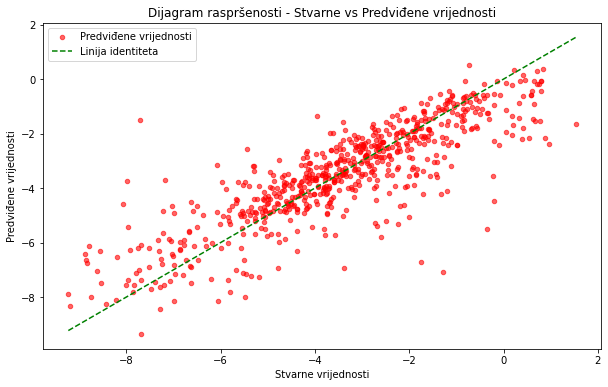

In [17]:
plt.figure(figsize=(10, 6))  # Increase plot size

plt.scatter(y_test, y_pred_prvi, c='red', s=20, alpha=0.6, label='Predviđene vrijednosti')  # Adjust point size and opacity
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='green', label='Linija identiteta')
plt.xlabel('Stvarne vrijednosti')
plt.ylabel('Predviđene vrijednosti')
plt.title('Dijagram raspršenosti - Stvarne vs Predviđene vrijednosti')

plt.legend()
plt.show()

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Vizualizacija distribucije ciljne varijable
fig = make_subplots(rows=1, cols=2, subplot_titles=("Treniranje", "Testiranje"))

fig.add_trace(go.Histogram(x=y_train, nbinsx=20, name='Treniranje', marker_color='blue'), row=1, col=1)
fig.add_trace(go.Histogram(x=y_test, nbinsx=20, name='Testiranje', marker_color='red'), row=1, col=2)

fig.update_layout(title_text='Distribucija ciljne varijable u skupovima za treniranje i testiranje')
fig.show()


# POBOLJŠANI MODEL - 2D DESKRIPTORI + FINGERPRINTS

In [20]:
train_set,test_set=train_test_split(final_data_new,test_size=.2,random_state=42) 
train_set.shape, test_set.shape

((2680, 718), (671, 718))

In [21]:
# Definiranje značajki i ciljne varijable
features = final_data_new.columns[3:]
target = 'Solubility'

# Podijela podataka na skupove za treniranje i testiranje
X_train, X_test, y_train, y_test = train_test_split(final_data_new[features], final_data_new[target], test_size=0.2, random_state=42)

# Definiranje parametara za GridSearchCV
param_grid = {
    'n_estimators': [500, 700, 900],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 5, 7]
}

# Inicijalizacija XGBoost modela
model_drugi = xgb.XGBRegressor()

# Inicijalizacija GridSearchCV
grid_search = GridSearchCV(model_drugi, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Izvršavanje pretraživanja s GridSearchCV
grid_search.fit(X_train, y_train)

# Ispis najboljih parametara
print("Najbolji parametri:", grid_search.best_params_)

# Treniranje modela s najboljim parametrima na cijelom skupu za treniranje
best_model_drugi = grid_search.best_estimator_
best_model_drugi.fit(X_train, y_train)

# Predviđanje na testnom skupu
y_pred_drugi = best_model_drugi.predict(X_test)

# Izračunavanje srednjekvadratne pogreške
mse = mean_squared_error(y_test, y_pred_drugi)
print('Mean Squared Error:', mse)

# Izračunavanje R2 koeficijenta determinacije
r2 = r2_score(y_test, y_pred_drugi)
print('R2 Score:', r2)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Najbolji parametri: {'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 700}
Mean Squared Error: 1.0498095859011467
R2 Score: 0.7692129218645234


## STVARNE VS. PREDVIĐENE VRIJEDNOSTI - GRAF

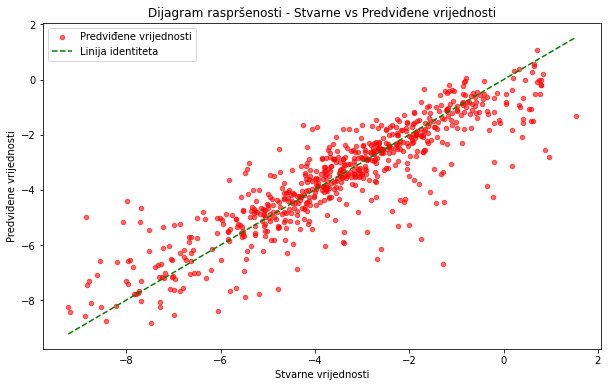

In [22]:
plt.figure(figsize=(10, 6))  # Increase plot size

plt.scatter(y_test, y_pred_drugi, c='red', s=20, alpha=0.6, label='Predviđene vrijednosti')  # Adjust point size and opacity
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='green', label='Linija identiteta')
plt.xlabel('Stvarne vrijednosti')
plt.ylabel('Predviđene vrijednosti')
plt.title('Dijagram raspršenosti - Stvarne vs Predviđene vrijednosti')

plt.legend()
plt.show()

# POBOLJŠANI MODEL - 2D DESKRIPTORI + FINGERPRINTS + STRATIFIER 

In [23]:
num_bins = 4  # Or choose a number based on your data distribution
bins = pd.cut(final_data_new['Solubility'], bins=num_bins, labels=False)
final_data_new['solubility_bins'] = bins

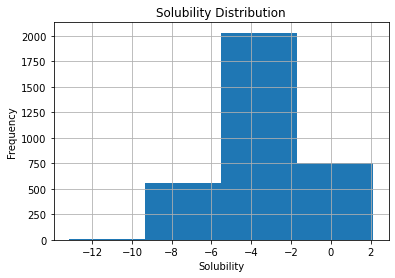

In [24]:
final_data_new['Solubility'].hist(bins=num_bins)
plt.title('Solubility Distribution')
plt.xlabel('Solubility')
plt.ylabel('Frequency')
plt.show()

In [25]:
num_bins = 9  # Adjust as needed
final_data_new['solubility_bins'] = pd.qcut(data[target], q=num_bins, labels=False, duplicates='drop')

# Odabir značajki i ciljne varijable
features = final_data_new.columns[3:-1]
target = 'Solubility'

# Podijela podataka na skupove za treniranje i testiranje sa stratifikacijom
X_train, X_test, y_train, y_test = train_test_split(final_data_new[features], final_data_new[target], test_size=0.2, random_state=42, stratify=final_data_new['solubility_bins'])

# Podijela skupa za treniranje na treniranje i validaciju sa stratifikacijom
train_bins = pd.cut(y_train, bins=num_bins, labels=False)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, stratify=train_bins, random_state=42)

# Definiranje parametara za GridSearchCV
param_grid = {
    'n_estimators': [500, 600, 700],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [2, 4, 6]
}

# Inicijalizacija XGBoost modela
model_treci = xgb.XGBRegressor()

# Inicijalizacija GridSearchCV
grid_search = GridSearchCV(model_treci, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Izvršavanje pretraživanja s GridSearchCV
grid_search.fit(X_train, y_train)

# Ispis najboljih parametara
print("Najbolji parametri:", grid_search.best_params_)

# Treniranje modela s najboljim parametrima na cijelom skupu za treniranje
best_model_treci = grid_search.best_estimator_
best_model_treci.fit(X_train, y_train)

# Predviđanje na testnom skupu
y_pred_treci = best_model_treci.predict(X_test)

# Izračunavanje srednjekvadratne pogreške
mse = mean_squared_error(y_test, y_pred_treci)
print('Mean Squared Error:', mse)

# Izračunavanje R2 koeficijenta determinacije
r2 = r2_score(y_test, y_pred_treci)
print('R2 Score:', r2)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Najbolji parametri: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 500}
Mean Squared Error: 1.3000746936953507
R2 Score: 0.7272468121314121


## STVARNE VS. PREDVIĐENE VRIJEDNOSTI - GRAF

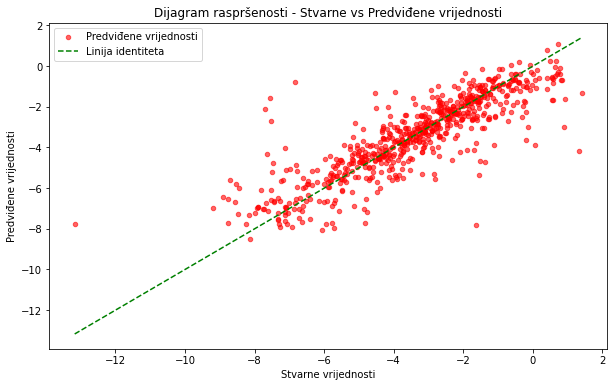

In [26]:
plt.figure(figsize=(10, 6))  # Increase plot size

plt.scatter(y_test, y_pred_treci, c='red', s=20, alpha=0.6, label='Predviđene vrijednosti')  # Adjust point size and opacity
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='green', label='Linija identiteta')
plt.xlabel('Stvarne vrijednosti')
plt.ylabel('Predviđene vrijednosti')
plt.title('Dijagram raspršenosti - Stvarne vs Predviđene vrijednosti')

plt.legend()
plt.show()

In [27]:
y_test.shape, y_pred_treci.shape

((671,), (671,))

# POBOLJŠANI MODEL - 2D DESKRIPTORI + FINGERPRINTS + STANDARDSCALER TARGETA

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(final_data_new['Solubility'].values.reshape(-1, 1))

StandardScaler()

In [30]:
scaled_target = scaler.transform(final_data_new['Solubility'].values.reshape(-1, 1))

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

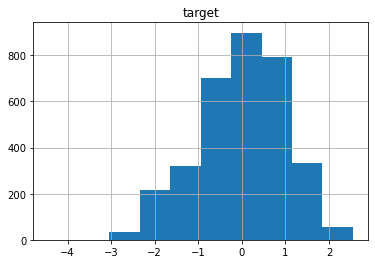

In [31]:
target_scaled=pd.DataFrame(data=scaled_target,columns=["target"])

target_scaled.hist()


In [32]:
# Definiranje značajki i ciljne varijable
features = final_data_new.columns[3:-1]
target = 'Solubility'

# Podijela podataka na skupove za treniranje i testiranje
X_train, X_test, y_train, y_test = train_test_split(final_data_new[features],target_scaled, 
                                                    test_size=0.2, random_state=42)

# Definiranje parametara za GridSearchCV
param_grid = {
    'regressor__n_estimators': [400, 500, 600],
    'regressor__learning_rate': [0.05, 0.1, 0.15],
    'regressor__max_depth': [6, 8, 10]
}

# Inicijalizacija XGBoost modela
xgb_model = xgb.XGBRegressor()

# Korištenje StandardScaler-a samo za ciljnu varijablu
tt_model = TransformedTargetRegressor(regressor=xgb_model, transformer=StandardScaler())

# Inicijalizacija GridSearchCV s TransformedTargetRegressor
grid_search = GridSearchCV(tt_model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Izvršavanje pretraživanja s GridSearchCV
grid_search.fit(X_train, y_train)

# Ispis najboljih parametara
print("Najbolji parametri:", grid_search.best_params_)

# Treniranje modela s najboljim parametrima na cijelom skupu za treniranje
best_model_cetvrti = grid_search.best_estimator_
best_model_cetvrti.fit(X_train, y_train)

# Predviđanje na testnom skupu
y_pred_cetvrti = best_model_cetvrti.predict(X_test)

# Izračunavanje srednjekvadratne pogreške
mse = mean_squared_error(y_test, y_pred_cetvrti)
print('Mean Squared Error:', mse)

# Izračunavanje R2 koeficijenta determinacije
r2 = r2_score(y_test, y_pred_cetvrti)
print('R2 Score:', r2)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Najbolji parametri: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 6, 'regressor__n_estimators': 600}
Mean Squared Error: 0.2181714025214648
R2 Score: 0.769576299626147


In [33]:
y_pred_cetvrti.shape,y_test.shape
min(y_test)
y_test

,target
1138,-1.801849
2244,-1.139628
2594,0.733205
1220,-2.440945
3219,-0.165572
...,...
1616,0.230528
2553,0.194851
2761,0.039732
108,-0.147771


## STVARNE VS. PREDVIĐENE VRIJEDNOSTI - GRAF

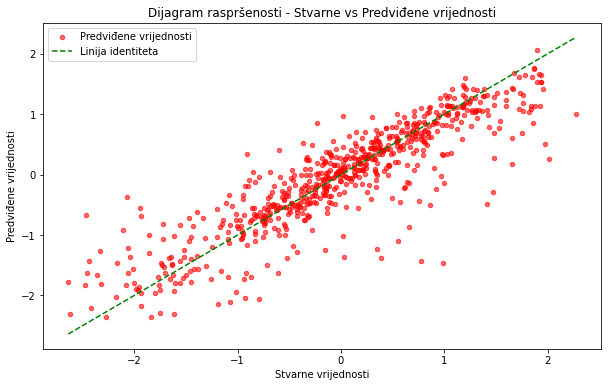

In [34]:
plt.figure(figsize=(10, 6))  # Increase plot size

plt.scatter(y_test, y_pred_cetvrti, c='red', s=20, alpha=0.6, label='Predviđene vrijednosti')  # Adjust point size and opacity
plt.plot([min(y_test["target"]), max(y_test["target"])], [min(y_test["target"]), max(y_test["target"])], linestyle='--', color='green', label='Linija identiteta')

plt.xlabel('Stvarne vrijednosti')
plt.ylabel('Predviđene vrijednosti')
plt.title('Dijagram raspršenosti - Stvarne vs Predviđene vrijednosti')
#plt.grid(True)  # Add grid
#plt.ylim(-3,3)
#plt.xlim(-3,3)


plt.legend()
plt.show()

# POBOLJŠANI MODEL - 2D DESKRIPTORI + FINGERPRINTS + STANDARDSCALER TARGETA + STRATIFIER

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Kreiranje kvantilno-baziranih binsa za ciljnu varijablu
num_bins = 10
final_data_new['solubility_bins'] = pd.qcut(final_data_new[target], q=num_bins, labels=False, duplicates='drop')

# Definiranje značajki i ciljne varijable
features = final_data_new.columns[3:-1]  # Isključuje 'solubility_bins'
target = 'Solubility'
#target_scaled = ...  # skalirana ciljna varijabla, zamijenite s vašom skaliranom varijablom

# Podijela podataka na skupove za treniranje i testiranje sa stratifikacijom
X_train, X_test, y_train, y_test = train_test_split(final_data_new[features], target_scaled, 
                                                    test_size=0.2, stratify=final_data_new['solubility_bins'], 
                                                    random_state=42)

# Definiranje parametara za GridSearchCV
param_grid = {
    'regressor__n_estimators': [500, 600, 700],
    'regressor__learning_rate': [0.05, 0.1, 0.15],
    'regressor__max_depth': [2, 4, 6]
}

# Inicijalizacija XGBoost modela
xgb_model = xgb.XGBRegressor()

# Korištenje StandardScaler-a samo za ciljnu varijablu
tt_model = TransformedTargetRegressor(regressor=xgb_model, transformer=StandardScaler())

# Inicijalizacija GridSearchCV s TransformedTargetRegressor
grid_search = GridSearchCV(tt_model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Izvršavanje pretraživanja s GridSearchCV
grid_search.fit(X_train, y_train)

# Ispis najboljih parametara
print("Najbolji parametri:", grid_search.best_params_)

# Treniranje modela s najboljim parametrima na cijelom skupu za treniranje
best_model_peti = grid_search.best_estimator_
best_model_peti.fit(X_train, y_train)

# Predviđanje na testnom skupu
y_pred_peti = best_model_cetvrti.predict(X_test)

# Izračunavanje srednjekvadratne pogreške
mse = mean_squared_error(y_test, y_pred_peti)
print('Mean Squared Error:', mse)

# Izračunavanje R2 koeficijenta determinacije
r2 = r2_score(y_test, y_pred_peti)
print('R2 Score:', r2)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Najbolji parametri: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 6, 'regressor__n_estimators': 500}
Mean Squared Error: 0.05699998293666677
R2 Score: 0.9428156650262293


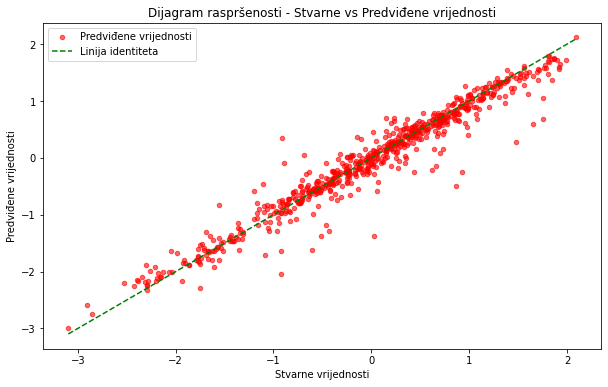

In [36]:
plt.figure(figsize=(10, 6))  # Increase plot size

plt.scatter(y_test, y_pred_peti, c='red', s=20, alpha=0.6, label='Predviđene vrijednosti')  # Adjust point size and opacity
plt.plot([min(y_test["target"]), max(y_test["target"])], [min(y_test["target"]), max(y_test["target"])], linestyle='--', color='green', label='Linija identiteta')

plt.xlabel('Stvarne vrijednosti')
plt.ylabel('Predviđene vrijednosti')
plt.title('Dijagram raspršenosti - Stvarne vs Predviđene vrijednosti')
#plt.grid(True)  # Add grid
#plt.ylim(-3,3)
#plt.xlim(-3,3)


plt.legend()
plt.show()